In [12]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756030 sha256=224cf92254f6a4d30754725585f883a62f085a4ae2b093739dbc01ca431fa086
  Stored in directory: /tmp/pip-ephem-wheel-cache-l9_j4hc3/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


In [13]:
!pip install pyproj==1.9.6

In [0]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [0]:
import pandas as pd
import numpy as np
import csv

In [0]:

bfire = pd.read_csv("/content/Aus_bushfire.csv")

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
bfire.Country.unique()

array(['AU', 'ID', 'NZ', 'NC', 'PG', 'FJ', 'VU', 'TL', 'SB'], dtype=object)

In [0]:
bfire = bfire[bfire.Country == 'AU']
del bfire['Unnamed: 0']

In [31]:
bfire

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,confidence,version,bright_ti5,frp,daynight,new lat,new long,Sub Urban,State,Region,Country
0,-42.12143,147.96153,304.2,0.33,0.56,04-12-2019,14:12,1,nominal,1.0NRT,280.0,1.6,N,-42.78161,147.56267,Sorell,Tasmania,Sorell,AU
1,-42.12246,147.96536,300.6,0.33,0.56,04-12-2019,14:12,1,nominal,1.0NRT,278.8,1.6,N,-42.78161,147.56267,Sorell,Tasmania,Sorell,AU
2,-42.12349,147.96916,307.2,0.33,0.56,04-12-2019,14:12,1,nominal,1.0NRT,278.3,2.8,N,-42.78161,147.56267,Sorell,Tasmania,Sorell,AU
3,-42.12545,147.97643,297.8,0.33,0.56,04-12-2019,14:12,1,nominal,1.0NRT,278.6,3.8,N,-42.78161,147.56267,Sorell,Tasmania,Sorell,AU
4,-42.12209,147.94337,296.0,0.34,0.56,04-12-2019,14:12,1,nominal,1.0NRT,279.7,0.8,N,-42.78161,147.56267,Sorell,Tasmania,Sorell,AU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678563,-30.86724,121.48753,307.0,0.45,0.63,20-04-2020,17:42,1,nominal,1.0NRT,284.4,1.6,N,-30.78204,121.49120,Boulder,Western Australia,Kalgoorlie/Boulder,AU
678564,-30.86910,116.27620,325.3,0.44,0.46,20-04-2020,17:42,1,nominal,1.0NRT,285.0,2.1,N,-30.64003,116.00365,Moora,Western Australia,Moora,AU
678565,-30.86863,116.27146,300.5,0.44,0.46,20-04-2020,17:42,1,nominal,1.0NRT,284.1,2.1,N,-30.64003,116.00365,Moora,Western Australia,Moora,AU
678566,-32.73023,116.04491,298.4,0.45,0.47,20-04-2020,17:42,1,nominal,1.0NRT,285.0,0.8,N,-32.84323,115.92201,Waroona,Western Australia,Waroona,AU


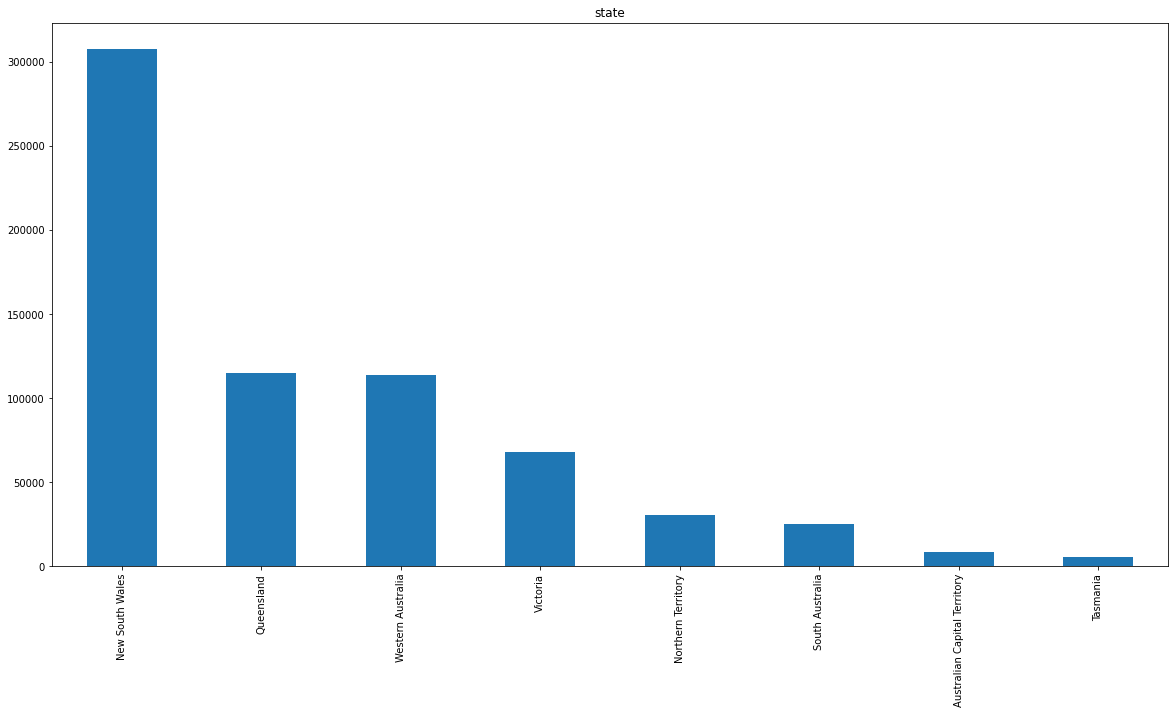

In [32]:
a=bfire['State'].value_counts().plot(kind='bar',figsize=(20,10),title="state")
plt.savefig('State.jpg')

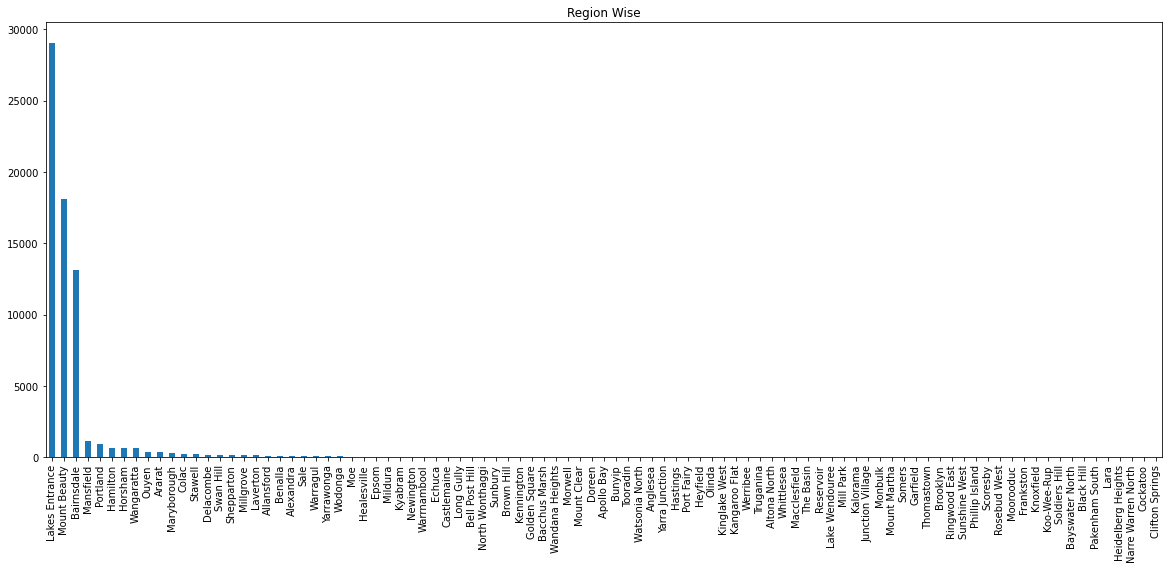

In [33]:
VIC =  bfire[bfire['State']=='Victoria']
B=VIC['Sub Urban'].value_counts().plot(kind='bar',figsize=(20,8),title='Region Wise')
plt.savefig('Victoria.jpg')

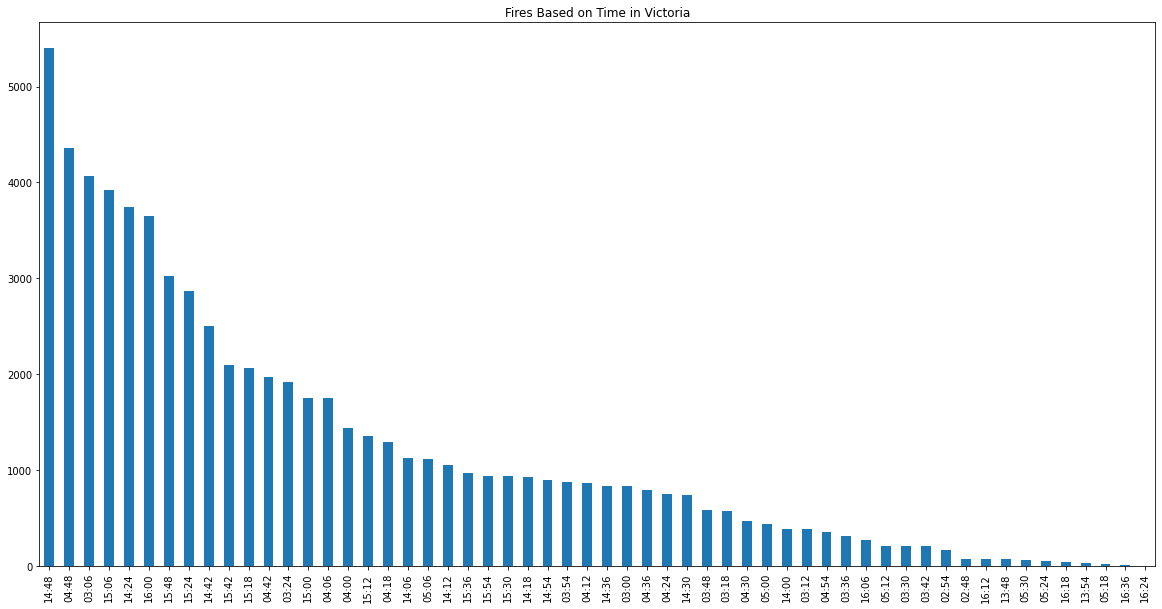

In [34]:
VIC['acq_time'].value_counts().plot(kind='bar',figsize=(20,10),title="Fires Based on Time in Victoria")

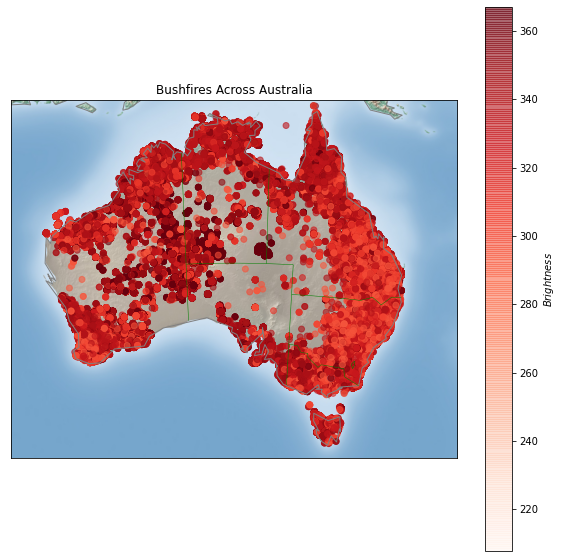

In [35]:
lat = bfire['latitude'].values
lon = bfire['longitude'].values
brg = bfire['bright_ti4'].values

fig = plt.figure(figsize = (10, 10))
m = Basemap(projection = 'lcc', resolution='c', lat_0 =-27.6, lon_0 = 134.35,width=5E6, height=4E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='green')
m.drawstates(color='green')

m.scatter(lon, lat, c= brg,latlon=True,cmap='Reds', alpha=0.6)
plt.title("Bushfires Across Australia")
plt.colorbar(label=r'$Brightness$')
plt.savefig('Bushfire Australia.jpg')

In [36]:
bfire['bright_ti4'].max()

367.0

In [0]:
main_hot = bfire[bfire['bright_ti4']>=367]

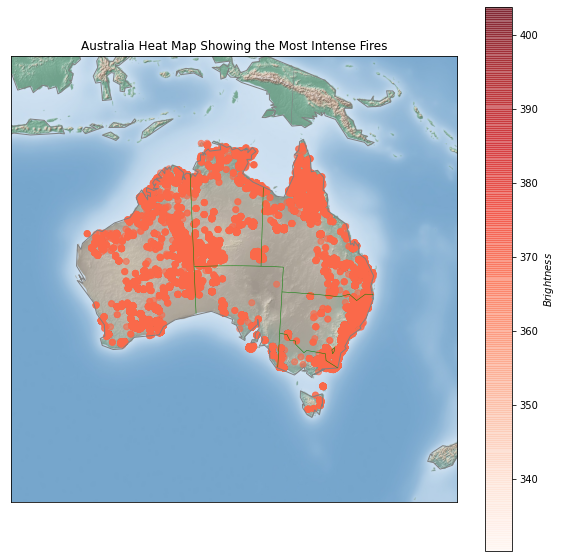

In [103]:
lat = main_hot['latitude'].values
lon = main_hot['longitude'].values
brg = main_hot['bright_ti4'].values

fig = plt.figure(figsize = (10, 10))
m = Basemap(projection = 'lcc', resolution='c', lat_0 =-27.6, lon_0 = 134.35,width=6E6, height=6E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='green')

m.scatter(lon, lat, c= brg,latlon=True,cmap='Reds', alpha=0.6)
plt.title("Australia Heat Map Showing the Most Intense Fires")
plt.colorbar(label=r'$Brightness$')
plt.savefig('Most Intense Fires.jpg')

In [0]:
bfirev = bfire.loc[bfire['State'] == 'Victoria']

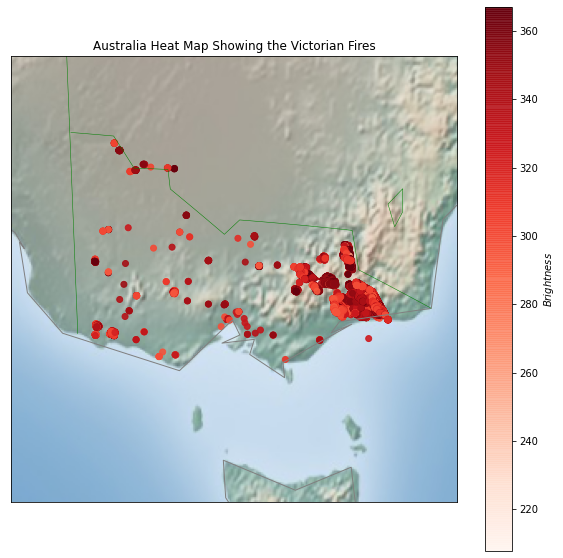

In [84]:

lat = bfirev['latitude'].values
lon = bfirev['longitude'].values
brg = bfirev['bright_ti4'].values

fig = plt.figure(figsize = (10, 10))
m = Basemap(projection = 'lcc', resolution='c', lat_0 =-37.020, lon_0 = 144.964,width=6E6, height=6E6)
m.etopo(scale=0.6, alpha=0.6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='green')

m.scatter(lon, lat, c= brg,latlon=True,cmap='Reds', alpha=0.9)
plt.title("Australia Heat Map Showing the Victorian Fires")
plt.colorbar(label=r'$Brightness$')
plt.savefig('Victorian Fires.jpg')

In [81]:
bfirev

,Unnamed: 0,Unnamed: 0.1,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,confidence,version,bright_ti5,frp,daynight,new lat,new long,Sub Urban,State,Region,Country
5,5,5,-37.34665,147.95268,295.0,0.45,0.63,4/12/19,14:12,1,nominal,1.0NRT,283.4,0.7,N,-37.88115,147.98103,Lakes Entrance,Victoria,East Gippsland,AU
6,6,6,-37.35501,147.95996,304.7,0.45,0.63,4/12/19,14:12,1,nominal,1.0NRT,283.4,0.7,N,-37.88115,147.98103,Lakes Entrance,Victoria,East Gippsland,AU
7,7,7,-37.35629,147.96446,298.8,0.45,0.63,4/12/19,14:12,1,nominal,1.0NRT,283.3,0.7,N,-37.88115,147.98103,Lakes Entrance,Victoria,East Gippsland,AU
8,8,8,-37.35468,147.91432,303.6,0.45,0.63,4/12/19,14:12,1,nominal,1.0NRT,283.0,0.9,N,-37.88115,147.98103,Lakes Entrance,Victoria,East Gippsland,AU
9,9,9,-37.37527,147.98706,316.7,0.45,0.63,4/12/19,14:12,1,nominal,1.0NRT,284.2,3.2,N,-37.88115,147.98103,Lakes Entrance,Victoria,East Gippsland,AU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500183,501289,501289,-37.67102,147.58716,295.2,0.68,0.74,4/1/20,16:12,1,nominal,1.0NRT,276.4,2.8,N,-37.82289,147.61041,Bairnsdale,Victoria,East Gippsland,AU
500184,501290,501290,-37.62817,147.53273,303.3,0.68,0.74,4/1/20,16:12,1,nominal,1.0NRT,271.6,2.3,N,-37.82289,147.61041,Bairnsdale,Victoria,East Gippsland,AU
500185,501291,501291,-37.64915,147.54849,295.2,0.68,0.74,4/1/20,16:12,1,nominal,1.0NRT,275.4,2.2,N,-37.82289,147.61041,Bairnsdale,Victoria,East Gippsland,AU
500186,501292,501292,-37.65618,147.55580,295.0,0.68,0.74,4/1/20,16:12,1,nominal,1.0NRT,271.2,2.6,N,-37.82289,147.61041,Bairnsdale,Victoria,East Gippsland,AU


In [85]:
bfire

,Unnamed: 0,Unnamed: 0.1,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,confidence,version,bright_ti5,frp,daynight,new lat,new long,Sub Urban,State,Region,Country
0,0,0,-42.12143,147.96153,304.2,0.33,0.56,4/12/19,14:12,1,nominal,1.0NRT,280.0,1.6,N,-42.78161,147.56267,Sorell,Tasmania,Sorell,AU
1,1,1,-42.12246,147.96536,300.6,0.33,0.56,4/12/19,14:12,1,nominal,1.0NRT,278.8,1.6,N,-42.78161,147.56267,Sorell,Tasmania,Sorell,AU
2,2,2,-42.12349,147.96916,307.2,0.33,0.56,4/12/19,14:12,1,nominal,1.0NRT,278.3,2.8,N,-42.78161,147.56267,Sorell,Tasmania,Sorell,AU
3,3,3,-42.12545,147.97643,297.8,0.33,0.56,4/12/19,14:12,1,nominal,1.0NRT,278.6,3.8,N,-42.78161,147.56267,Sorell,Tasmania,Sorell,AU
4,4,4,-42.12209,147.94337,296.0,0.34,0.56,4/12/19,14:12,1,nominal,1.0NRT,279.7,0.8,N,-42.78161,147.56267,Sorell,Tasmania,Sorell,AU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509097,510260,510260,-31.92075,121.39183,367.0,0.47,0.39,6/1/20,5:54,1,low,1.0NRT,328.6,56.1,D,-30.86667,121.76667,Stoneville,Western Australia,Kalgoorlie/Boulder,AU
509098,510261,510261,-31.92255,121.38205,367.0,0.47,0.39,6/1/20,5:54,1,low,1.0NRT,326.0,58.9,D,-30.86667,121.76667,Stoneville,Western Australia,Kalgoorlie/Boulder,AU
509099,510262,510262,-31.89621,121.50442,350.2,0.47,0.40,6/1/20,5:54,1,nominal,1.0NRT,311.3,13.3,D,-30.86667,121.76667,Stoneville,Western Australia,Kalgoorlie/Boulder,AU
509100,510263,510263,-31.89712,121.49946,352.3,0.47,0.40,6/1/20,5:54,1,nominal,1.0NRT,321.4,36.5,D,-30.86667,121.76667,Stoneville,Western Australia,Kalgoorlie/Boulder,AU


In [0]:
bfirensw = bfire.loc[bfire['State'] == 'New South Wales']

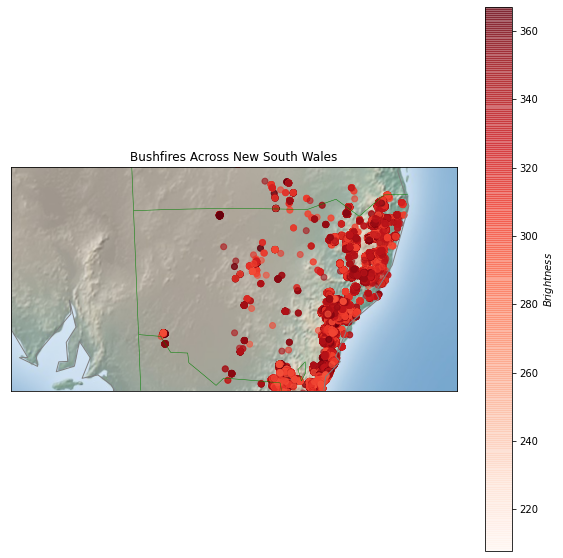

In [89]:
lat = bfirensw['latitude'].values
lon = bfirensw['longitude'].values
brg = bfirensw['bright_ti4'].values

fig = plt.figure(figsize = (10, 10))
m = Basemap(projection = 'lcc', resolution='c', lat_0 =-31.840233, lon_0 = 145.612793, width=6E6, height=6E6)
m.etopo(scale=0.6, alpha=0.6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='green')
m.drawstates(color='green')

m.scatter(lon, lat, c= brg,latlon=True,cmap='Reds', alpha=0.6)
plt.title("Bushfires Across New South Wales")
plt.colorbar(label=r'$Brightness$')
plt.savefig('Bushfire New South Wales.jpg')

In [0]:
bfirew = bfire.loc[bfire['State'] == 'Western Australia']

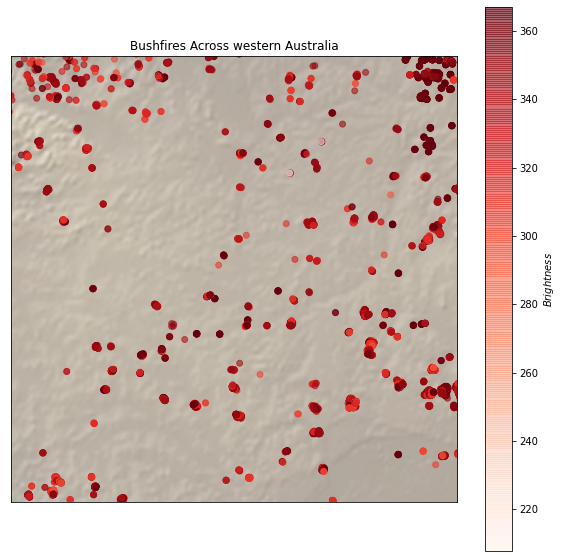

In [92]:
lat = bfirew['latitude'].values
lon = bfirew['longitude'].values
brg = bfirew['bright_ti4'].values

fig = plt.figure(figsize = (10, 10))
m = Basemap(projection = 'lcc', resolution='c', lat_0 =-25.760321, lon_0 = 122.805176, width=6E6, height=6E6)
m.etopo(scale=0.6, alpha=0.6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='green')
m.drawstates(color='green')

m.scatter(lon, lat, c= brg,latlon=True,cmap='Reds', alpha=0.6)
plt.title("Bushfires Across western Australia")
plt.colorbar(label=r'$Brightness$')
plt.savefig('Bushfire western Australia.jpg')

In [0]:
bfirent = bfire.loc[bfire['State'] == 'Northern Territory']

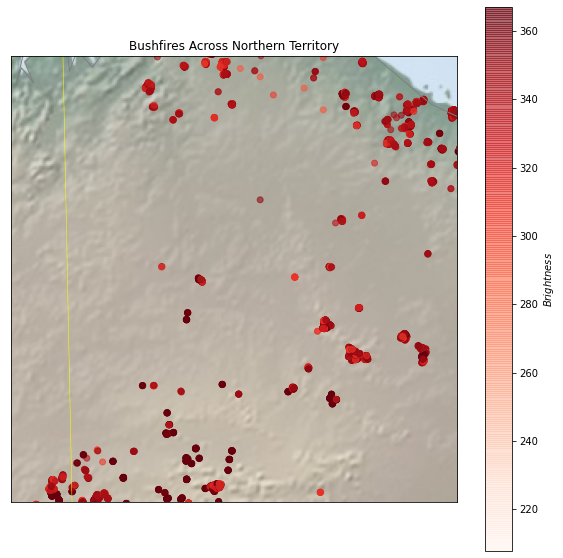

In [95]:
lat = bfirent['latitude'].values
lon = bfirent['longitude'].values
brg = bfirent['bright_ti4'].values

fig = plt.figure(figsize = (10, 10))
m = Basemap(projection = 'lcc', resolution='c', lat_0 =-19.491411, lon_0 = 132.550964, width=6E6, height=6E6)
m.etopo(scale=0.6, alpha=0.6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='green')
m.drawstates(color='yellow')

m.scatter(lon, lat, c= brg,latlon=True,cmap='Reds', alpha=0.6)
plt.title("Bushfires Across Northern Territory")
plt.colorbar(label=r'$Brightness$')
plt.savefig('Bushfire Northern Territory.jpg')

In [0]:
bfireq = bfire.loc[bfire['State'] == 'Queensland']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


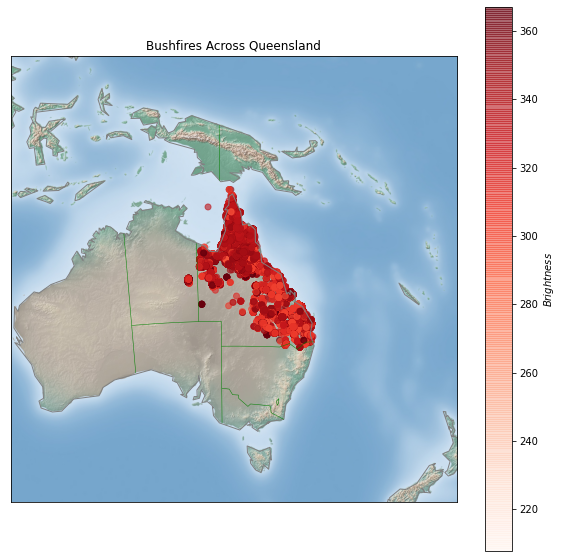

In [101]:
lat = bfireq['latitude'].values
lon = bfireq['longitude'].values
brg = bfireq['bright_ti4'].values

fig = plt.figure(figsize = (10, 10))
m = Basemap(projection = 'lcc', resolution='c', lat_0 =-20.917574, lon_0 = 142.702789, width=6E6, height=6E6)
m.etopo(scale=0.6, alpha=0.6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='green')
m.drawstates(color='green')

m.scatter(lon, lat, c= brg,latlon=True,cmap='Reds', alpha=0.6)
plt.title("Bushfires Across Queensland")
plt.colorbar(label=r'$Brightness$')
plt.savefig('Bushfire Queensland.jpg')

In [0]:
bfiresa = bfire.loc[bfire['State'] == 'South Australia']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


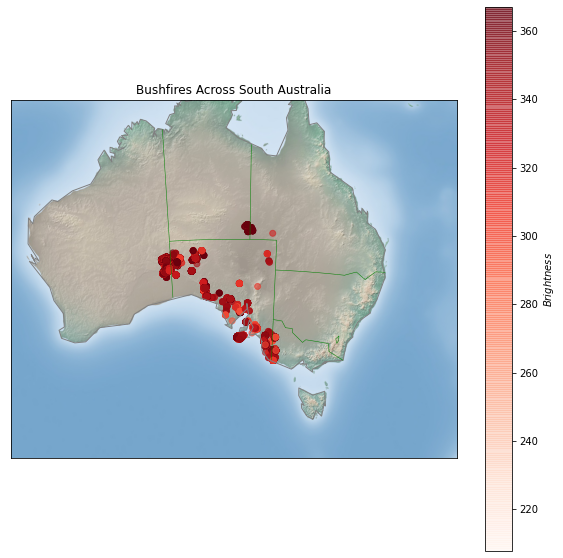

In [100]:
lat = bfiresa['latitude'].values
lon = bfiresa['longitude'].values
brg = bfiresa['bright_ti4'].values

fig = plt.figure(figsize = (10, 10))
m = Basemap(projection = 'lcc', resolution='c', lat_0 =	-30.000233, lon_0 = 136.209152, width=6E6, height=6E6)
m.etopo(scale=0.6, alpha=0.6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='green')
m.drawstates(color='green')

m.scatter(lon, lat, c= brg,latlon=True,cmap='Reds', alpha=0.6)
plt.title("Bushfires Across South Australia")
plt.colorbar(label=r'$Brightness$')
plt.savefig('Bushfire South Australia.jpg')